### **Predicting Passenger Satisfaction**

This notebook is designed to demonstrate a complete data science workflow, focusing on **predicting passenger satisfaction** based on data from travel and survey datasets. It provides a comprehensive approach to data preprocessing, feature engineering, and modeling, integrating industry-standard tools and best practices.

The goal is to process the raw datasets, handle inconsistencies, and develop a machine learning model that predicts passenger satisfaction levels accurately. The steps include:

1. **Data Loading and Inspection**:
   - Access datasets from Google Drive.
   - Inspect structure and initial statistics of the data.

2. **Data Cleaning**:
   - Identify and handle missing values.
   - Detect and address outliers.
   - Perform consistency checks to ensure data quality.

3. **Feature Engineering**:
   - Transform existing features for better model compatibility.
   - Create new derived features to capture additional insights.

4. **Exploratory Data Analysis (EDA)**:
   - Visualize relationships and distributions within the data.
   - Identify patterns and correlations that inform model design.

5. **Model Training and Evaluation**:
   - Use machine learning algorithms to predict satisfaction levels.
   - Evaluate models using metrics such as accuracy, precision, and recall.

6. **Test Data Processing and Predictions**:
   - Apply the same preprocessing pipeline to test datasets.
   - Evaluate model performance on unseen data.

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
import shap
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Load the datasets (update the paths with the correct file locations on your Google Drive)
travel_data = pd.read_csv('/content/drive/My Drive/Traveldata_train.csv')
survey_data = pd.read_csv('/content/drive/My Drive/Surveydata_train.csv')

In [ ]:
# Display the first few rows of each dataset
travel_data.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
survey_data.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
# Check data types and null values for initial insights
travel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [ ]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [ ]:
# Summary statistics for numerical features in Travel data
travel_data.describe()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000
mean,9.884719e+07,39.419647,1978.888185,14.647092,15.005222
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.882360e+07,27.000000,1359.000000,0.000000,0.000000
50%,9.884719e+07,40.000000,1923.000000,0.000000,0.000000
75%,9.887078e+07,51.000000,2538.000000,12.000000,13.000000
max,9.889438e+07,85.000000,6951.000000,1592.000000,1584.000000


In [ ]:
# Summary statistics for numerical features in Survey data
survey_data.describe()

,ID,Overall_Experience
count,9.437900e+04,94379.000000
mean,9.884719e+07,0.546658
std,2.724501e+04,0.497821
min,9.880000e+07,0.000000
25%,9.882360e+07,0.000000
50%,9.884719e+07,1.000000
75%,9.887078e+07,1.000000
max,9.889438e+07,1.000000


In [ ]:
# Check for any missing values in both datasets
travel_data.isnull().sum()

,0
ID,0
Gender,77
Customer_Type,8951
Age,33
Type_Travel,9226
Travel_Class,0
Travel_Distance,0
Departure_Delay_in_Mins,57
Arrival_Delay_in_Mins,357


In [ ]:
survey_data.isnull().sum()

,0
ID,0
Overall_Experience,0
Seat_Comfort,61
Seat_Class,0
Arrival_Time_Convenient,8930
Catering,8741
Platform_Location,30
Onboard_Wifi_Service,30
Onboard_Entertainment,18
Online_Support,91


In [ ]:
# Load the Data Dictionary for reference
data_dict = pd.read_excel('/content/drive/My Drive/Data_Dictionary.xlsx')

In [ ]:
# Display the data dictionary to understand feature definitions and expected values
data_dict.head(10)

,Data Dictionary - Travel Data,Unnamed: 1,Unnamed: 2
0,Column Name,Column Description,Column Value Examples
1,ID,The unique ID of the passenger,"Continuous values like 98800001, 98800002, etc."
2,Gender,The gender of the passenger,Male\nFemale
3,Customer_Type,Loyalty type of the passenger,Loyal Customer\nDisloyal Customer
4,Age,The age of the passenger,"Continuous values like 48, 52, 9, etc."
5,Type_Travel,Purpose of travel for the passenger,Personal Travel\nBusiness Travel
6,Travel_Class,The train class that the passenger traveled in,Business\nEco
7,Travel_Distance,The distance traveled by the passenger,"Continuous values like 272, 780, 853, etc."
8,Departure_Delay_in_Mins,The delay (in minutes) in train departure,"Continuous values like 9, 15, 13, etc."
9,Arrival_Delay_in_Mins,The delay (in minutes) in train arrival,"Continuous values like 0, 15, 18, etc."


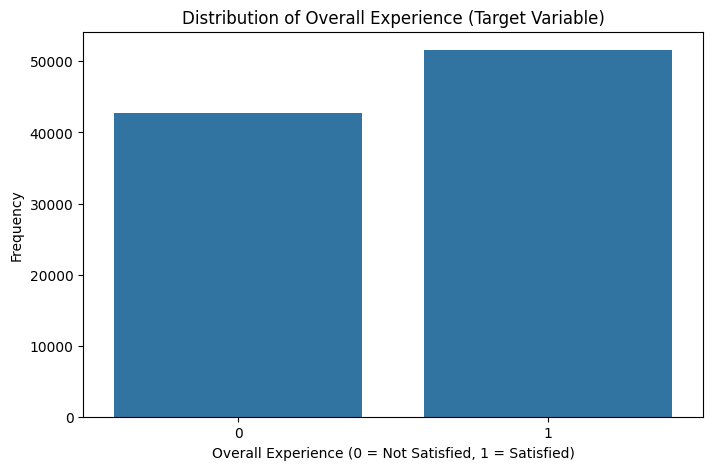

In [ ]:
# Plot the distribution of the target variable 'Overall_Experience'
plt.figure(figsize=(8, 5))
sns.countplot(x='Overall_Experience', data=survey_data)
plt.title("Distribution of Overall Experience (Target Variable)")
plt.xlabel("Overall Experience (0 = Not Satisfied, 1 = Satisfied)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Print counts of each class
class_distribution = survey_data['Overall_Experience'].value_counts()
class_distribution

,count
Overall_Experience,
1,51593
0,42786


In [ ]:
# Merge travel_data and survey_data on 'ID' for a comprehensive dataset
merged_data = pd.merge(travel_data, survey_data, on='ID', how='inner')

In [ ]:
# Check the merged data to confirm successful merging and inspect the first few rows
merged_data.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
# Check for any potential null values after merging
merged_data.isnull().sum()

,0
ID,0
Gender,77
Customer_Type,8951
Age,33
Type_Travel,9226
Travel_Class,0
Travel_Distance,0
Departure_Delay_in_Mins,57
Arrival_Delay_in_Mins,357
Overall_Experience,0


In [ ]:
# Create a copy of merged_data to preserve the original dataset
cleaned_data = merged_data.copy()

In [ ]:
# Display initial missing values
cleaned_data.isnull().sum()

,0
ID,0
Gender,77
Customer_Type,8951
Age,33
Type_Travel,9226
Travel_Class,0
Travel_Distance,0
Departure_Delay_in_Mins,57
Arrival_Delay_in_Mins,357
Overall_Experience,0


In [ ]:
# Step 1: Handle Missing Values

# a. Numerical Columns: Impute with median
numerical_features = ['Age', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']
imputer_median = SimpleImputer(strategy='median')
cleaned_data[numerical_features] = imputer_median.fit_transform(cleaned_data[numerical_features])


In [ ]:
# b. Categorical Columns: Impute with a constant 'Unknown'
categorical_features = [
    'Gender', 'Customer_Type', 'Type_Travel', 'Seat_Comfort', 'Seat_Class',
    'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service',
    'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking',
    'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service',
    'Cleanliness', 'Online_Boarding'
]
imputer_constant = SimpleImputer(strategy='constant', fill_value='Unknown')
cleaned_data[categorical_features] = imputer_constant.fit_transform(cleaned_data[categorical_features])

In [ ]:
# Display missing values after handling to confirm
print("Missing Values After Handling:")
print(cleaned_data.isnull().sum())

Missing Values After Handling:
ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64


In [ ]:
# Step 2: Outlier Detection and Handling
# Detect outliers in numerical columns and clip extreme values
def clip_outliers(data, features, threshold=3):
    for feature in features:
        z_scores = np.abs(stats.zscore(data[feature]))
        data[feature] = np.where(z_scores > threshold, data[feature].median(), data[feature])
clip_outliers(cleaned_data, numerical_features)

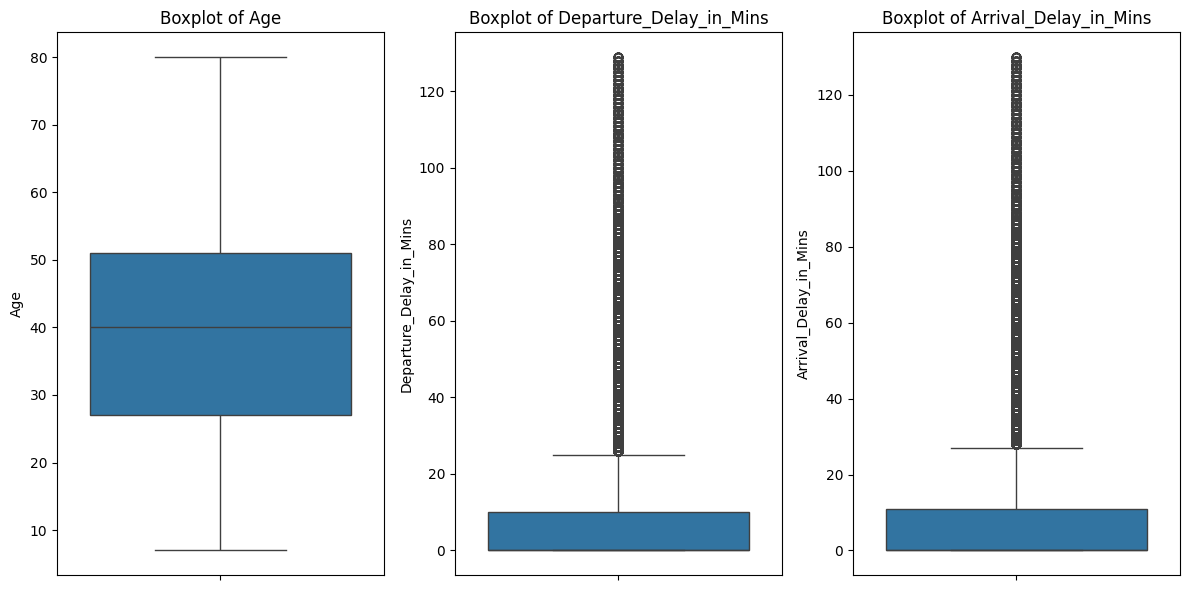

In [ ]:
# Visualize outliers after clipping
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(y=cleaned_data[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

In [ ]:
# Step 3: Consistency Checks
# Check for duplicate rows and remove if found
duplicates = cleaned_data.duplicated()
if duplicates.sum() > 0:
    print(f"Found {duplicates.sum()} duplicate rows. Removing them.")
    cleaned_data = cleaned_data[~duplicates]
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [ ]:
# Step 4: Encoding Categorical Variables
# Ordinal Encoding for quality-related features with assumed order
ordinal_features = ['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
                    'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
                    'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling',
                    'CheckIn_Service', 'Cleanliness', 'Online_Boarding']
ordering = ['Poor', 'Needs Improvement', 'Acceptable', 'Good', 'Excellent']
for feature in ordinal_features:
    cleaned_data[feature] = pd.Categorical(cleaned_data[feature], categories=ordering, ordered=True)
    cleaned_data[feature] = cleaned_data[feature].cat.codes  # Convert to numerical codes

In [ ]:
# Label Encoding for binary categorical features
label_encodable_features = ['Gender', 'Customer_Type', 'Type_Travel']
label_encoders = {}
for feature in label_encodable_features:
    le = LabelEncoder()
    cleaned_data[feature] = le.fit_transform(cleaned_data[feature])
    label_encoders[feature] = le

In [ ]:
# One-Hot Encoding for non-ordinal categorical feature 'Seat_Class'
cleaned_data = pd.get_dummies(cleaned_data, columns=['Seat_Class'], drop_first=True)

In [ ]:
# Step 5: Feature Engineering

# a. Binary Delay Features: Departure and Arrival Delayed
cleaned_data['Departure_Delayed'] = cleaned_data['Departure_Delay_in_Mins'].apply(lambda x: 1 if x > 0 else 0)
cleaned_data['Arrival_Delayed'] = cleaned_data['Arrival_Delay_in_Mins'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# b. Age Binning
cleaned_data['Age_Group'] = pd.cut(cleaned_data['Age'], bins=[0, 18, 35, 50, 65, 100], labels=[1, 2, 3, 4, 5])

In [ ]:
# Drop original Age column after binning
cleaned_data.drop(columns=['Age'], inplace=True)

In [ ]:
# c. Standardize Travel_Distance
scaler = StandardScaler()
cleaned_data['Travel_Distance'] = scaler.fit_transform(cleaned_data[['Travel_Distance']])

In [ ]:
# d. Aggregation Feature: Average satisfaction by Travel_Class
avg_satisfaction_by_class = cleaned_data.groupby('Travel_Class')['Overall_Experience'].mean()
cleaned_data['Class_Avg_Satisfaction'] = cleaned_data['Travel_Class'].map(avg_satisfaction_by_class)

In [ ]:
# e. Interaction Term: Distance and Delay interaction
cleaned_data['Distance_Delay_Interaction'] = cleaned_data['Travel_Distance'] * cleaned_data['Departure_Delay_in_Mins']

In [ ]:
# Drop ID column (not needed for modeling)
cleaned_data.drop(columns=['ID'], inplace=True)

In [ ]:
# Final check on the cleaned and engineered data
print("Data After Cleaning and Feature Engineering:")
print(cleaned_data.head())
print("Final Shape of the Data:", cleaned_data.shape)

Data After Cleaning and Feature Engineering:
   Gender  Customer_Type  Type_Travel Travel_Class  Travel_Distance  \
0       0              1            2     Business        -1.660469   
1       1              1            1          Eco         0.215099   
2       0              1            0     Business        -0.892926   
3       0              1            0     Business        -1.166284   
4       0              1            0     Business         0.002054   

   Departure_Delay_in_Mins  Arrival_Delay_in_Mins  Overall_Experience  \
0                      0.0                    5.0                   0   
1                      9.0                    0.0                   0   
2                     77.0                  119.0                   1   
3                     13.0                   18.0                   0   
4                      0.0                    0.0                   1   

   Seat_Comfort  Arrival_Time_Convenient  ...  Baggage_Handling  \
0             1       

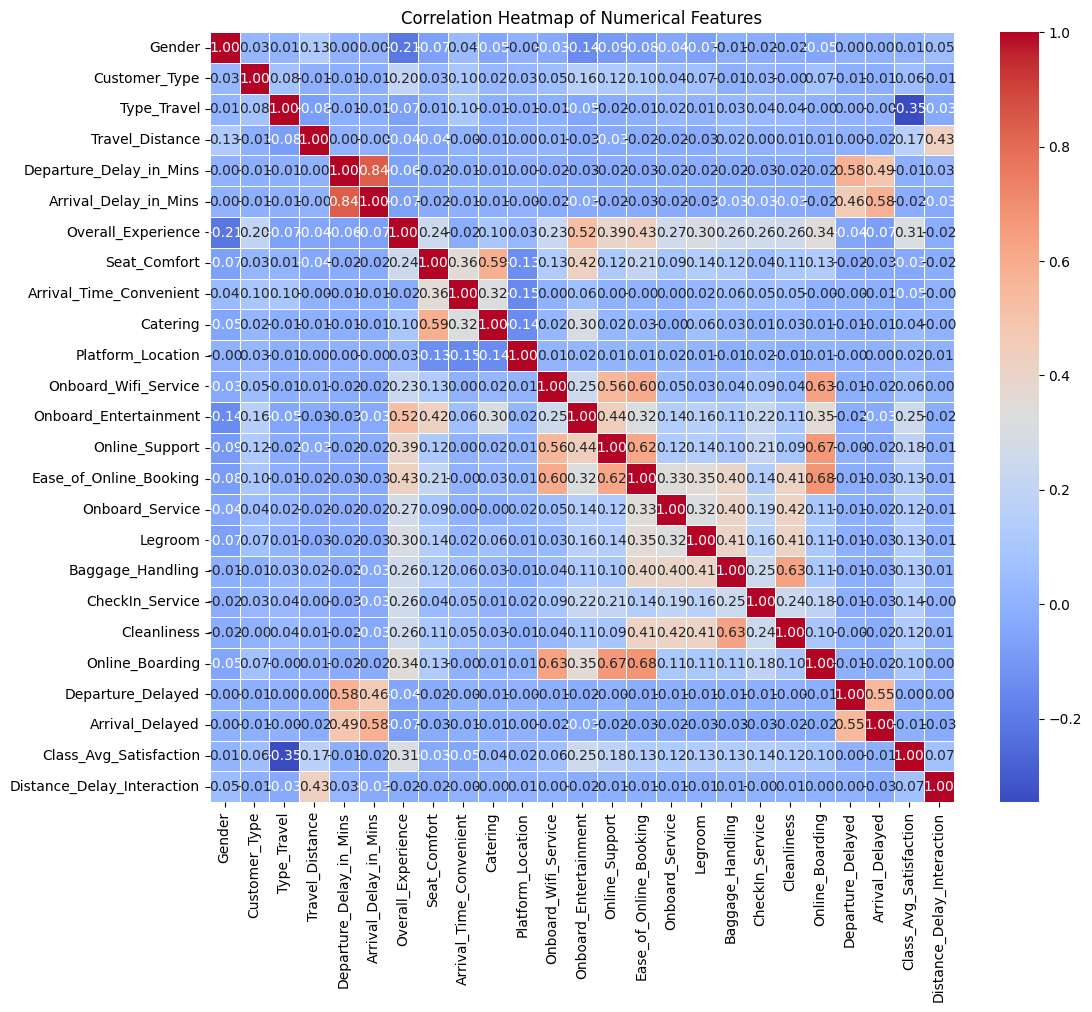

In [ ]:
# 1. Correlation Heatmap
# Select only numerical columns for correlation analysis
numerical_cols = cleaned_data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

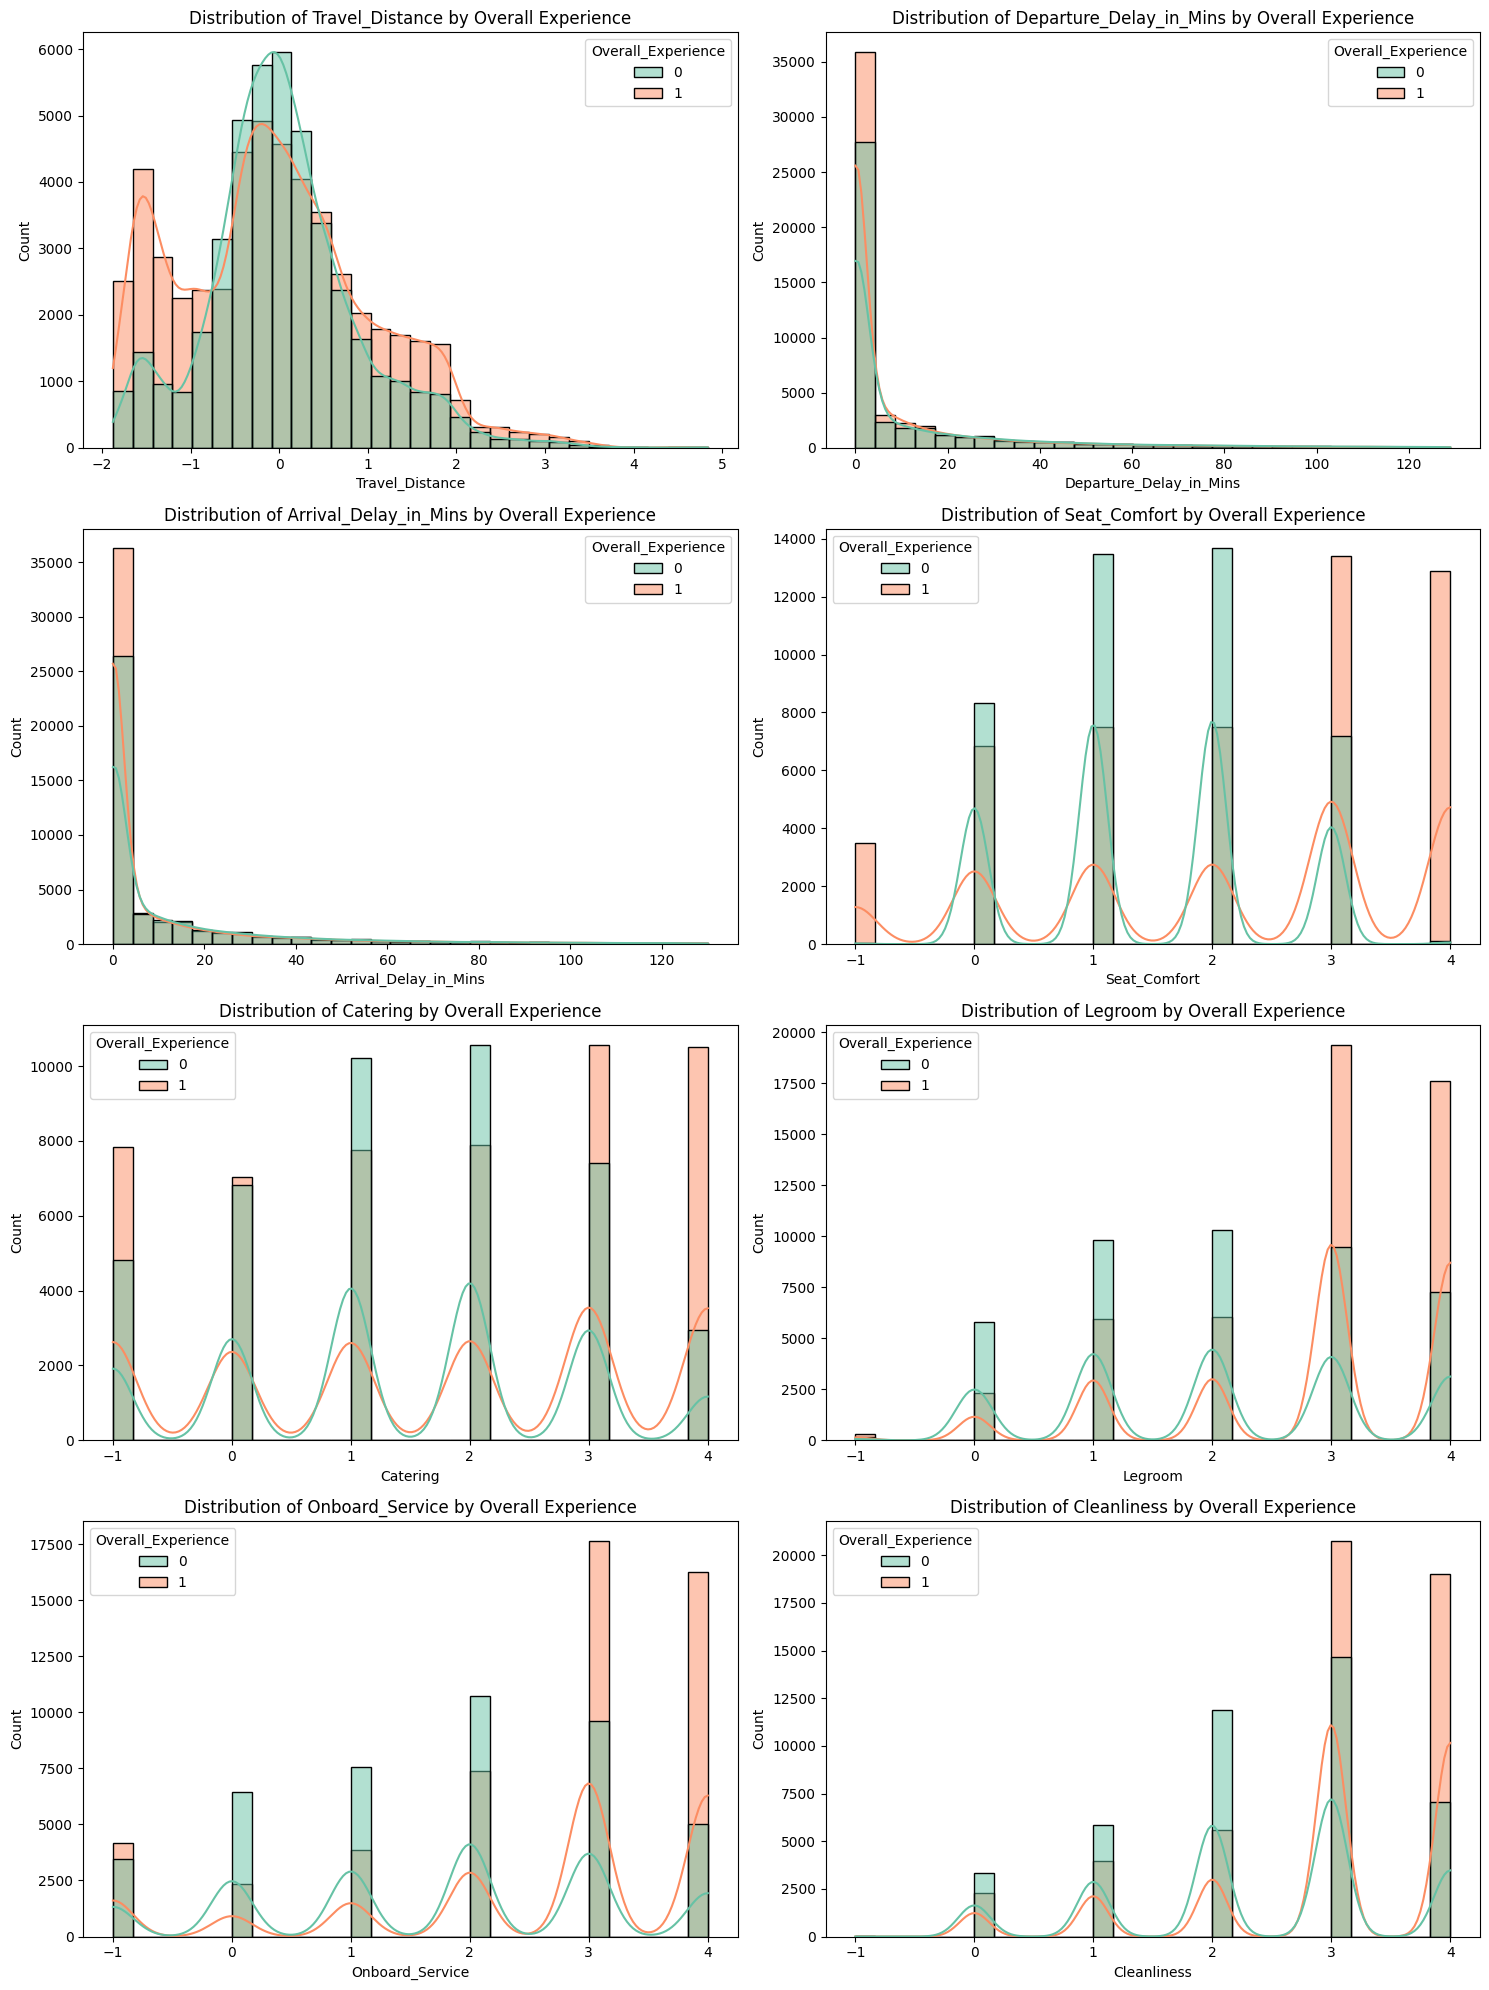

In [ ]:
# 2. Distributions by Satisfaction Level
# Visualize the distribution of key features by `Overall_Experience`
key_features = ['Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',
                'Seat_Comfort', 'Catering', 'Legroom', 'Onboard_Service', 'Cleanliness']

plt.figure(figsize=(15, 20))
for i, feature in enumerate(key_features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data=cleaned_data, x=feature, hue="Overall_Experience", kde=True, bins=30, palette="Set2")
    plt.title(f"Distribution of {feature} by Overall Experience")
plt.tight_layout()
plt.show()

In [ ]:
# 3. Feature Importance Using a Decision Tree Classifier
# Use a simple Decision Tree to get a sense of feature importance
X = cleaned_data.drop(columns=['Overall_Experience'])
y = cleaned_data['Overall_Experience']

In [ ]:
# Convert categorical features to numeric if necessary
for column in X.select_dtypes(include=['object']).columns:
    X[column] = LabelEncoder().fit_transform(X[column])

In [ ]:
# Train a Decision Tree classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X, y)

DecisionTreeClassifier(random_state=42)

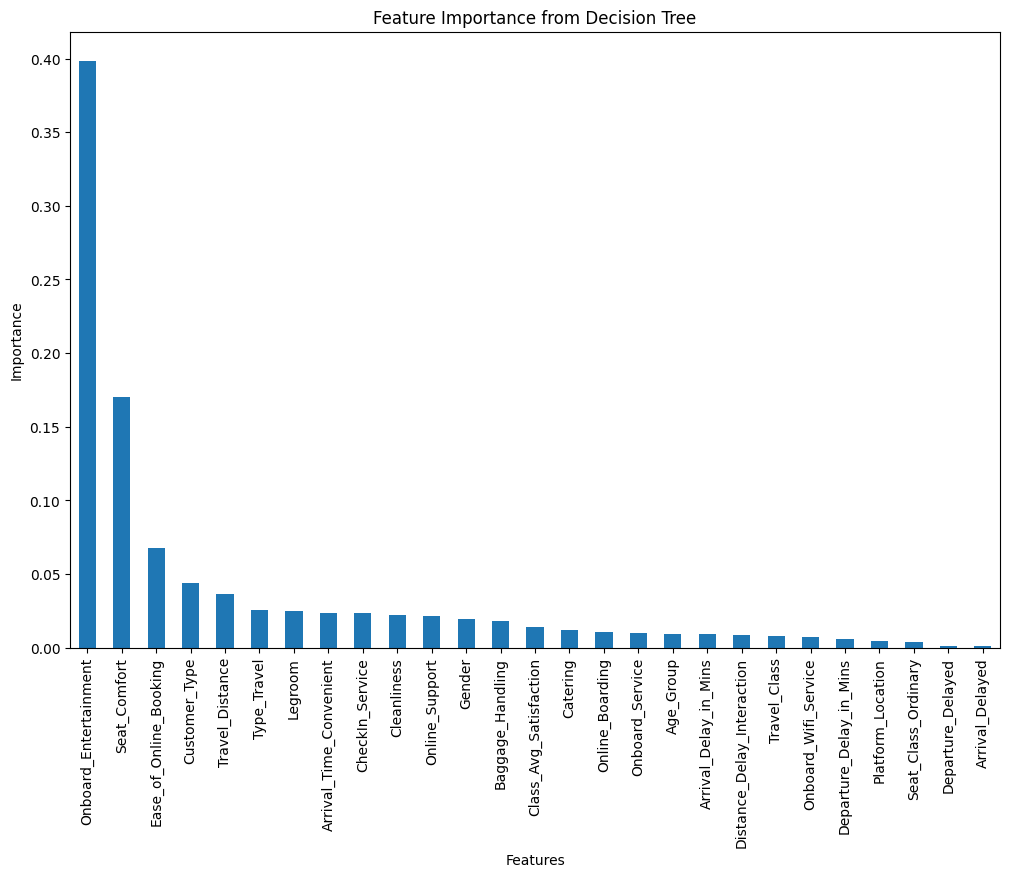

In [ ]:
# Plot feature importance
feature_importance = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
feature_importance.plot(kind='bar')
plt.title("Feature Importance from Decision Tree")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [ ]:
# 4. Feature Importance Using Chi-Square Test for Categorical Features
# Scale features to be between 0 and 1 for chi-square test compatibility
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Perform chi-square test
chi2_scores, p_values = chi2(X_scaled, y)
chi2_results = pd.DataFrame({"Feature": X.columns, "Chi2 Score": chi2_scores, "P-Value": p_values})
chi2_results = chi2_results.sort_values(by="Chi2 Score", ascending=False)

print("Chi-Square Test Results for Feature Importance:")
print(chi2_results)

Chi-Square Test Results for Feature Importance:
                       Feature   Chi2 Score        P-Value
25      Class_Avg_Satisfaction  4742.161833   0.000000e+00
3                 Travel_Class  4328.416815   0.000000e+00
12       Onboard_Entertainment  2784.700660   0.000000e+00
14      Ease_of_Online_Booking  1726.079734   0.000000e+00
13              Online_Support  1404.561953  2.143424e-307
0                       Gender  1100.839320  2.170018e-241
20             Online_Boarding  1090.256149  4.331754e-239
15             Onboard_Service   991.750113  1.115582e-217
16                     Legroom   826.311036  1.027265e-181
7                 Seat_Comfort   763.883215  3.843503e-168
18             CheckIn_Service   617.938757  2.099283e-136
11        Onboard_Wifi_Service   533.340471  5.299263e-118
1                Customer_Type   514.432011  6.885635e-114
17            Baggage_Handling   452.987809  1.613951e-100
19                 Cleanliness   441.104535   6.223828e-98
23      

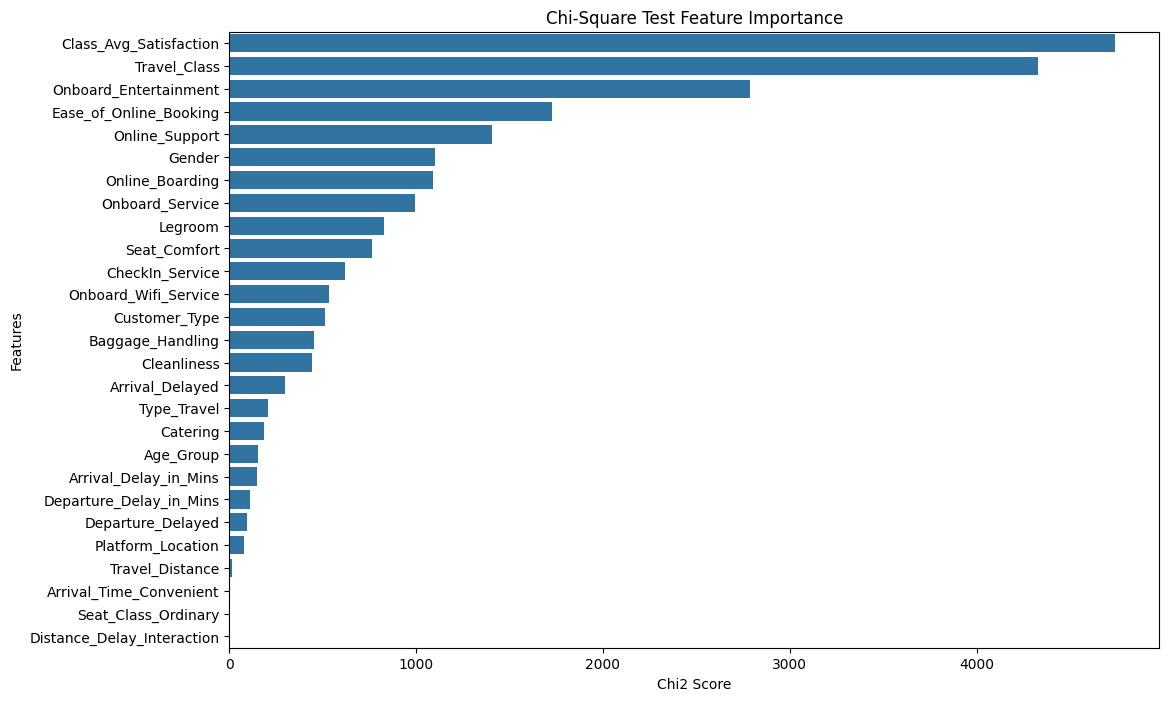

In [ ]:
# Visualize Chi-Square feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x="Chi2 Score", y="Feature", data=chi2_results)
plt.title("Chi-Square Test Feature Importance")
plt.xlabel("Chi2 Score")
plt.ylabel("Features")
plt.show()

In [ ]:
# Check unique values in ordinal features
for feature in ordinal_features:
    print(f"Unique values in {feature}:", X[feature].unique())

Unique values in Seat_Comfort: [ 1  0  2  3  4 -1]
Unique values in Arrival_Time_Convenient: [ 4  1  2 -1  3  0]
Unique values in Catering: [ 4  0  1 -1  2  3]
Unique values in Platform_Location: [-1  1]
Unique values in Onboard_Wifi_Service: [ 3  1  2  4  0 -1]
Unique values in Onboard_Entertainment: [ 1  0  3  4  2 -1]
Unique values in Online_Support: [ 2  3  4  0 -1  1]
Unique values in Ease_of_Online_Booking: [ 1  3  4  2  0 -1]
Unique values in Onboard_Service: [ 1  4  2  3  0 -1]
Unique values in Legroom: [ 2  1  4  3  0 -1]
Unique values in Baggage_Handling: [ 1  0  4  2  3 -1]
Unique values in CheckIn_Service: [ 3  1  2  4  0 -1]
Unique values in Cleanliness: [ 1  3  4  2  0 -1]
Unique values in Online_Boarding: [ 0  3  4  2  1 -1]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Separate features and target
X = cleaned_data.drop(columns=['Overall_Experience'])
y = cleaned_data['Overall_Experience']

# Define categorical features for encoding
ordinal_features = ['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
                    'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
                    'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling',
                    'CheckIn_Service', 'Cleanliness', 'Online_Boarding']
nominal_features = ['Gender', 'Customer_Type', 'Type_Travel', 'Seat_Class_Ordinary']

# Update ordinal_categories to include all observed unique values
# Get unique values for each ordinal feature
ordinal_unique_values = [X[feature].unique().tolist() for feature in ordinal_features]

# Update ordinal_categories based on observed values
# Adding 'Unknown' for unseen categories during prediction
ordinal_categories = []
for values in ordinal_unique_values:
    # Convert all values to strings before adding 'Unknown'
    values = [str(v) for v in values]
    ordinal_categories.append(sorted(list(set(values + ['Unknown']))))

# Ensure ordinal and nominal features are treated as strings
for feature in ordinal_features + nominal_features:
    X[feature] = X[feature].astype(str)

# Define preprocessor to handle numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns),
        ('ord', OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=np.nan), ordinal_features), # Updated OrdinalEncoder parameters
        ('nom', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_features)
    ], remainder='drop'
)

# Transform the features
X_processed = preprocessor.fit_transform(X)

# Convert the processed data to a DataFrame with column names
# Generate column names for the one-hot encoded nominal features
nominal_encoded_columns = preprocessor.transformers_[2][1].get_feature_names_out(nominal_features)
columns = list(X.select_dtypes(include=['float64', 'int64']).columns) + ordinal_features + list(nominal_encoded_columns)
X_processed = pd.DataFrame(X_processed, columns=columns)

# Check data types after transformation
print("Data types in transformed dataset:\n", X_processed.dtypes.value_counts())

# Confirm all columns are numeric
assert X_processed.select_dtypes(include=['object']).empty, "There are still non-numeric columns after transformation."

# Split the data into training and validation sets with stratification
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, stratify=y, random_state=42)

# Verify shape and type of training data
print("Training and validation data prepared.")
print("Shape of X_train:", X_train.shape)
print("Sample of transformed data:\n", X_train.head())


Data types in transformed dataset:
 float64    28
Name: count, dtype: int64
Training and validation data prepared.
Shape of X_train: (75503, 28)
Sample of transformed data:
        Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
45266         1.365927                 0.122691              -0.444295   
21531        -0.487266                -0.483570              -0.490522   
31049        -0.901681                -0.157122               0.156659   
15009        -1.484391                -0.483570              -0.490522   
66132         0.046803                -0.250393               0.249113   

       Departure_Delayed  Arrival_Delayed  Class_Avg_Satisfaction  \
45266           1.190638         1.188041                1.046703   
21531          -0.839886        -0.841722               -0.955380   
31049           1.190638         1.188041               -0.955380   
15009          -0.839886        -0.841722               -0.955380   
66132           1.190638         1.1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import lightgbm as lgb

# Baseline Model Performance
print("Baseline Model Performance:")

# Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_log))
print(classification_report(y_val, y_pred_log))

# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_val)
print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred_tree))
print(classification_report(y_val, y_pred_tree))

# Advanced Models

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))

# XGBoost
xgboost = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train, y_train)
y_pred_xgb = xgboost.predict(X_val)
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print(classification_report(y_val, y_pred_xgb))

# LightGBM
lightgbm = lgb.LGBMClassifier(random_state=42)
lightgbm.fit(X_train, y_train)
y_pred_lgb = lightgbm.predict(X_val)
print("LightGBM Accuracy:", accuracy_score(y_val, y_pred_lgb))
print(classification_report(y_val, y_pred_lgb))

# Stacking Models
estimators = [
    ('rf', rf),
    ('xgb', xgboost),
    ('lgb', lightgbm)
]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)
y_pred_stack = stacking.predict(X_val)
print("Stacking Model Accuracy:", accuracy_score(y_val, y_pred_stack))
print(classification_report(y_val, y_pred_stack))

# Hyperparameter Tuning with Randomized Search on LightGBM
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 31, 50],
    'min_child_samples': [5, 10, 20]
}

random_search = RandomizedSearchCV(estimator=lightgbm, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

# Evaluate tuned model
y_pred_tuned = best_model.predict(X_val)
print("Tuned LightGBM Accuracy:", accuracy_score(y_val, y_pred_tuned))
print(classification_report(y_val, y_pred_tuned))

# Print best parameters found by random search
print("Best parameters for LightGBM:", random_search.best_params_)


Baseline Model Performance:
Logistic Regression Accuracy: 0.8294659885568977
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      8557
           1       0.84      0.85      0.84     10319

    accuracy                           0.83     18876
   macro avg       0.83      0.83      0.83     18876
weighted avg       0.83      0.83      0.83     18876

Decision Tree Accuracy: 0.925725789362153
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8557
           1       0.93      0.93      0.93     10319

    accuracy                           0.93     18876
   macro avg       0.92      0.93      0.93     18876
weighted avg       0.93      0.93      0.93     18876

Random Forest Accuracy: 0.9470226742954015
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8557
           1       0.96      0.95      0.95     10319

    accuracy        

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Step 7.1: Advanced Stacked Model with Tuned Meta-Model
# Use a stronger meta-model for stacking, like GradientBoostingClassifier with tuned parameters
stacking_advanced = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgboost),
        ('lgb', lightgbm)
    ],
    final_estimator=GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=4),
    passthrough=True
)
stacking_advanced.fit(X_train, y_train)
y_pred_stack_advanced = stacking_advanced.predict(X_val)
print("Advanced Stacking Model Accuracy:", accuracy_score(y_val, y_pred_stack_advanced))
print(classification_report(y_val, y_pred_stack_advanced))

# Step 7.2: Further LightGBM Tuning with Grid Search
# Fine-tune the LightGBM model with additional parameters for improved accuracy
from sklearn.model_selection import GridSearchCV

lgb_param_grid = {
    'n_estimators': [400, 500],
    'learning_rate': [0.03, 0.05],
    'max_depth': [10, 12],
    'num_leaves': [50, 70, 90],
    'min_child_samples': [15, 20]
}

lightgbm_tuned_advanced = GridSearchCV(estimator=lightgbm, param_grid=lgb_param_grid, scoring='accuracy', cv=3, n_jobs=-1)
lightgbm_tuned_advanced.fit(X_train, y_train)
print("Best parameters for LightGBM after tuning:", lightgbm_tuned_advanced.best_params_)
y_pred_lgb_advanced = lightgbm_tuned_advanced.predict(X_val)
print("Tuned LightGBM Accuracy:", accuracy_score(y_val, y_pred_lgb_advanced))
print(classification_report(y_val, y_pred_lgb_advanced))

# Step 7.3: Threshold Optimization for Stacking Model
# Find the optimal threshold for maximizing F1-score
probs = stacking_advanced.predict_proba(X_val)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_val, probs)

# Calculate F1 for each threshold to find the best one
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal threshold for maximizing F1-score: {optimal_threshold}")

# Apply optimal threshold for final predictions
y_pred_threshold = (probs >= optimal_threshold).astype(int)
print("Stacking Model with Optimal Threshold Accuracy:", accuracy_score(y_val, y_pred_threshold))
print(classification_report(y_val, y_pred_threshold))


[LightGBM] [Info] Number of positive: 41274, number of negative: 34229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 876
[LightGBM] [Info] Number of data points in the train set: 75503, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546654 -> initscore=0.187160
[LightGBM] [Info] Start training from score 0.187160
[LightGBM] [Info] Number of positive: 33019, number of negative: 27383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 876
[LightGBM] [Info] Number of data points in the train set: 60402, number of used features: 28
[LightGBM] [Info] [bin

In [ ]:
# Load the test datasets
test_travel_data = pd.read_csv('/content/drive/My Drive/Traveldata_test.csv')
test_survey_data = pd.read_csv('/content/drive/My Drive/Surveydata_test.csv')

# Merge test travel data and survey data on 'ID'
test_data = pd.merge(test_travel_data, test_survey_data, on='ID', how='inner')

# Step 1: Impute Missing Values
# a. Numerical Columns: Use median imputation
numerical_features = ['Age', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']
test_data[numerical_features] = imputer_median.transform(test_data[numerical_features])

# b. Categorical Columns: Fill missing values with 'Unknown'
test_data[categorical_features] = imputer_constant.transform(test_data[categorical_features])

# Step 2: Feature Engineering on Test Data

# a. Binary Delay Features
test_data['Departure_Delayed'] = test_data['Departure_Delay_in_Mins'].apply(lambda x: 1 if x > 0 else 0)
test_data['Arrival_Delayed'] = test_data['Arrival_Delay_in_Mins'].apply(lambda x: 1 if x > 0 else 0)

# b. Age Binning
test_data['Age_Group'] = pd.cut(test_data['Age'], bins=[0, 18, 35, 50, 65, 100], labels=[1, 2, 3, 4, 5])
test_data.drop(columns=['Age'], inplace=True)  # Drop original Age column

# c. Standardize Travel_Distance using the scaler fit on training data
test_data['Travel_Distance'] = distance_scaler.transform(test_data[['Travel_Distance']])

# d. Map Average Satisfaction by Class
test_data['Class_Avg_Satisfaction'] = test_data['Travel_Class'].map(avg_satisfaction_by_class)

# e. Interaction Term: Distance and Delay
test_data['Distance_Delay_Interaction'] = test_data['Travel_Distance'] * test_data['Departure_Delay_in_Mins']

# Step 3: Encoding Categorical Variables

# Ordinal Encoding for test data using the same categories from training
for feature in ordinal_features:
    test_data[feature] = pd.Categorical(test_data[feature], categories=ordering, ordered=True)
    test_data[feature] = test_data[feature].cat.codes

# Label Encoding for binary features in test data
for feature, encoder in label_encoders.items():
    test_data[feature] = encoder.transform(test_data[feature])

# One-Hot Encoding for 'Seat_Class' (ensure it aligns with training data)
test_data = pd.get_dummies(test_data, columns=['Seat_Class'], drop_first=True)

# Step 4: Align test data with training feature columns

# Identify any missing columns in the test data (compared to X_train)
missing_cols = set(X_train.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0  # Add missing columns with a default value of 0

# Ensure the order of columns in test_data matches X_train
test_data = test_data[X_train.columns]

# Step 5: Predict with the Model
test_predictions = stacking_advanced.predict(test_data)

# Step 6: Prepare Submission File
submission = pd.DataFrame({'ID': test_survey_data['ID'], 'Overall_Experience': test_predictions})
submission.to_csv('/content/drive/My Drive/Submission.csv', index=False)

print("Submission file created successfully.")


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Age_Group
- Arrival_Delay_in_Mins
- Arrival_Delayed
- Arrival_Time_Convenient
- Baggage_Handling
- ...


In [ ]:
import pandas as pd

# Load the test datasets
test_travel_data = pd.read_csv('/content/drive/My Drive/Traveldata_test.csv')
test_survey_data = pd.read_csv('/content/drive/My Drive/Surveydata_test.csv')

# Merge test travel data and survey data on 'ID'
test_data = pd.merge(test_travel_data, test_survey_data, on='ID', how='inner')


# Get the training feature names (the columns used in your model)
training_feature_names = X_train.columns  # Assuming X_train is your training feature matrix

# Initialize an empty DataFrame with these columns
aligned_test_data = pd.DataFrame(columns=training_feature_names)

# Add the test data, preserving its values, but aligning the columns
for col in test_data.columns:
    if col in aligned_test_data.columns:
        aligned_test_data[col] = test_data[col]
    else:
        print(f"Warning: Column {col} from test data is not in training data structure and will be ignored.")

# Fill any missing columns with 0 or NaN if you think those features are not present in the test data
aligned_test_data = aligned_test_data.fillna(0)

# Check if feature alignment worked
print("Test data after alignment:\n", aligned_test_data.head())


Test data after alignment:
    Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              532                      0.0                    0.0   
1             1425                      9.0                   28.0   
2             2832                      0.0                    0.0   
3             1352                      0.0                    0.0   
4             1610                     17.0                    0.0   

   Departure_Delayed  Arrival_Delayed  Class_Avg_Satisfaction  \
0                  0                0                       0   
1                  0                0                       0   
2                  0                0                       0   
3                  0                0                       0   
4                  0                0                       0   

   Distance_Delay_Interaction    Seat_Comfort Arrival_Time_Convenient  \
0                           0      Acceptable              Acceptable   
1             